## Database analysis
- Analyse the file that generates the tf record.
- Can also suggest improvement
- The idea is if one of the checks fail then go fix it and then rerun this from start. Continue till you reach end of this script without error

In [1]:
import pandas as pd
import os, glob, shutil
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from IPython.display import display
from IPython.display import Image
print("Setup Complete")

Setup Complete


#### Helper Function

In [20]:
def barplot_pin_distribution(input_df, title="Pin count distribution"):
    _temp = input_df.groupby('filename').filename.count() 
    if len(_temp)>0:
        df = _temp[_temp<11111111]
        plt.figure(figsize=(16,6))
        plt.title(title)
        sns.barplot(x=df.value_counts().index, y=df.value_counts().values)
    else:
        print("[MSG]: DF set in empty.")


### Load

In [3]:
# FPath
# df_train = pd.read_csv('D:/FZ_WS/JyNB/TF_Research_Api_LD_2_0/research/object_detection/images/H_Dataset_00/train_labels.csv')
# df_test  = pd.read_csv('D:/FZ_WS/JyNB/TF_Research_Api_LD_2_0/research/object_detection/images/H_Dataset_00/test_labels.csv')
# df_train = pd.read_csv('D:/FZ_WS/JyNB/TF_Research_Api_LD_2_0/research/object_detection/images/train_labels.csv')
# df_test  = pd.read_csv('D:/FZ_WS/JyNB/TF_Research_Api_LD_2_0/research/object_detection/images/test_labels.csv')

df_train = pd.read_csv('D:/FZ_WS/JyNB/TF_Research_Api_LD_2_0/research/object_detection/images/H_Dataset_00/AGIH-VR-G2571-61103-panelized/train_labels.csv')
df_test  = pd.read_csv('D:/FZ_WS/JyNB/TF_Research_Api_LD_2_0/research/object_detection/images/H_Dataset_00/AGIH-VR-G2571-61103-panelized/test_labels.csv')

# Join
df_all = pd.concat([df_train, df_test])
print(df_all.head())
print("Total df_train lines:",len(df_train))
print("Total df_test lines:",len(df_test))
print("Total:",len(df_all))

                                   filename width height class xmin ymin xmax  \
0  AGIH-VR-G2571-61103-panelized_1cr5_0.jpg   194    185  BODY   76   21  133   
1  AGIH-VR-G2571-61103-panelized_1cr5_0.jpg   194    185   PIN  135   34  168   
2  AGIH-VR-G2571-61103-panelized_1cr5_0.jpg   194    185   PIN  136  129  169   
3  AGIH-VR-G2571-61103-panelized_1cr5_0.jpg   194    185   PIN   42   82   78   
4  AGIH-VR-G2571-61103-panelized_1cr5_1.jpg   194    185  BODY   76   21  133   

  ymax  
0  162  
1   53  
2  148  
3  101  
4  162  
Total df_train lines: 4936
Total df_test lines: 0
Total: 4936


### Dimension control
- Validate all the dim

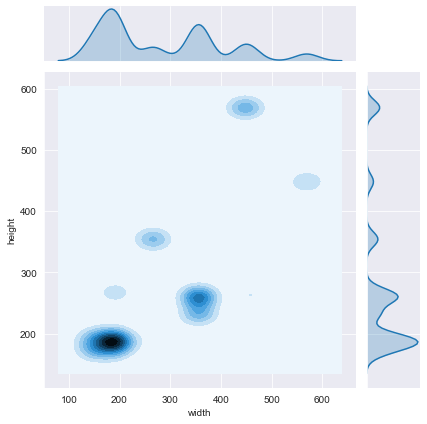

In [4]:
sns.set_style("darkgrid")
sns.jointplot(x=df_train['width'], y=df_train['height'], kind="kde")

In [5]:
# Train
_temp = df_train[df_train['xmax']<df_train['xmin']]
if (len(_temp)): print(_temp)
    
_temp = df_train[df_train['ymax']<df_train['ymin']]
if (len(_temp)): print(_temp)
    
_temp = df_train[df_train['height']<df_train['ymin']]
if (len(_temp)): print(_temp)
    
_temp = df_train[df_train['height']<df_train['ymax']]
if (len(_temp)): print(_temp)

_temp = df_train[df_train['width']<df_train['xmin']]
if (len(_temp)): print(_temp)
    
_temp = df_train[df_train['width']<df_train['xmax']]
if (len(_temp)): print(_temp)

if (len(df_train[df_train['width']< 1]) or len(df_train[df_train['height']<1])): print("Negative dimension")
if (len(df_train[df_train['xmin']<  1]) or len(df_train[df_train['xmax']<1])): print("Negative dimension x")
if (len(df_train[df_train['ymin']<  1]) or len(df_train[df_train['ymax']<1])): print("Negative dimension y")
print('Train Dimension analysis complete!')


# Test
_temp = df_test[df_test['xmax']<df_test['xmin']]
if (len(_temp)): print(_temp)
    
_temp = df_test[df_test['ymax']<df_test['ymin']]
if (len(_temp)): print(_temp)
    
_temp = df_test[df_test['height']<df_test['ymin']]
if (len(_temp)): print(_temp)
    
_temp = df_test[df_test['height']<df_test['ymax']]
if (len(_temp)): print(_temp)

_temp = df_test[df_test['width']<df_test['xmin']]
if (len(_temp)): print(_temp)
    
_temp = df_test[df_test['width']<df_test['xmax']]
if (len(_temp)): print(_temp)
    
    
if (len(df_test[df_test['width']< 1]) or len(df_test[df_test['height']<1])): print("Negative dimension")
if (len(df_test[df_test['xmin']<  1]) or len(df_test[df_test['xmax']<1])): print("Negative dimension x")
if (len(df_test[df_test['ymin']<  1]) or len(df_test[df_test['ymax']<1])): print("Negative dimension y")
print('Test Dimension analysis complete!')

Train Dimension analysis complete!
Test Dimension analysis complete!


### Uppercase
- Change all the classes to uppercase

In [6]:
def toUpperCase(x):
    x.upper()

In [7]:

print("Test Label != PIN or BODY: ")
print((df_test[df_test['class'] !='BODY']['class']!='PIN').value_counts() )
print("")
print("Train Label != PIN or BODY: ")
print((df_train[df_train['class'] !='PIN']['class']!='BODY').value_counts() )

# Save
if (False):
    df_test['class'].apply(toUpperCase)
    df_train['class'].apply(toUpperCase)
    df_train.to_csv('train_upper.csv', index=False)
    df_test.to_csv('test_upper.csv', index=False)

Test Label != PIN or BODY: 
Series([], Name: class, dtype: int64)

Train Label != PIN or BODY: 
False    1136
Name: class, dtype: int64


#### Ensure 1 body per image 

In [8]:
# Unique Images
print("Train")
print("Number of images: ", len(df_train.groupby('filename').count().index))
print("Number of BODY label: ", len(df_train[df_train['class']=='BODY']))
if (len(df_train.groupby('filename').count().index) != len(df_train[df_train['class']=='BODY'])):
    print("[ERROR] the number of body labels doesnt match the image count!")

print("Number of INVALID Body label: ", len(df_train[df_train['class']=='Body']))
print("Number of INVALID Pin label: ", len(df_train[df_train['class']=='Pin']))
print("Number of INVALID body label: ", len(df_train[df_train['class']=='body']))
print("Number of INVALID pin label: ", len(df_train[df_train['class']=='pin']))

Train
Number of images:  1136
Number of BODY label:  1136
Number of INVALID Body label:  0
Number of INVALID Pin label:  0
Number of INVALID body label:  0
Number of INVALID pin label:  0


In [9]:
# Unique Images
print("Test")
print("Number of images: ", len(df_test.groupby('filename').count().index))
print("Number of BODY label: ", len(df_test[df_test['class']=='BODY']))
if (len(df_test.groupby('filename').count().index) != len(df_test[df_test['class']=='BODY'])):
    print("[ERROR] the number of body labels doesnt match the image count!")

print("Number of INVALID Body label: ", len(df_test[df_test['class']=='Body']))
print("Number of INVALID Pin label: ", len(df_test[df_test['class']=='Pin']))
print("Number of INVALID body label: ", len(df_test[df_test['class']=='body']))
print("Number of INVALID pin label: ", len(df_test[df_test['class']=='pin']))

Test
Number of images:  0
Number of BODY label:  0
Number of INVALID Body label:  0
Number of INVALID Pin label:  0
Number of INVALID body label:  0
Number of INVALID pin label:  0


## Pin Count Distribution

In [10]:
Component_Pin_Group_train = df_train.groupby('filename').filename.count() 
print("train Pin+Body Data:\n", Component_Pin_Group_train.value_counts())

train Pin+Body Data:
 4    312
1    296
5    224
9    176
6     48
7     40
3     40
Name: filename, dtype: int64


In [11]:
# Unique Images
print("Test")
print("Number of images: ", len(df_test.groupby('filename').count().index))
print("Number of BODY label: ", len(df_test[df_test['class']=='BODY']))
if (len(df_test.groupby('filename').count().index) != len(df_test[df_test['class']=='BODY'])):
    print("[ERROR] the number of body labels doesnt match the image count!")

print("Number of INVALID Body label: ", len(df_test[df_test['class']=='Body']))
print("Number of INVALID Pin label: ", len(df_test[df_test['class']=='Pin']))
print("Number of INVALID body label: ", len(df_test[df_test['class']=='body']))
print("Number of INVALID pin label: ", len(df_test[df_test['class']=='pin']))

Test
Number of images:  0
Number of BODY label:  0
Number of INVALID Body label:  0
Number of INVALID Pin label:  0
Number of INVALID body label:  0
Number of INVALID pin label:  0


In [12]:
Component_Pin_Group_test = df_test.groupby('filename').filename.count() 
print("test Pin+Body Data:\n", Component_Pin_Group_test.value_counts())

test Pin+Body Data:
 Series([], Name: filename, dtype: int64)


#### Invalid pin count Distribution
The number of pins is more than 256

In [13]:
# TRAIN
# Pin > 256 i.e invalid
Component_Pin_Group_256 = Component_Pin_Group_train[Component_Pin_Group_train>256]
if (len(Component_Pin_Group_256) > 0):
    print("[ERROR]: No Pin count > 256. Invalid pins found!")    
    plt.figure(figsize=(16,6))
    plt.title("Histogram of pin count greater than 256")
    sns.distplot(a=Component_Pin_Group_256, kde=False)

    plt.figure(figsize=(16,6))
    plt.title("Cumalitive of pin count greater than 256")
    kwargs = {'cumulative': True}
    sns.distplot(Component_Pin_Group_256, hist_kws=kwargs, kde_kws=kwargs)
    print(Component_Pin_Group_256.value_counts())
else:
    print("[INFO]: No Pin count > 256. No invalid pins found!")

[INFO]: No Pin count > 256. No invalid pins found!


In [14]:
# Inspect details
# Component_Pin_Group_256[Component_Pin_Group_256>256].head()

# Search
# df_all [df_all['filename']=='CRC1TCTL0003_6_0_1-ic8.jpg'].head()

In [15]:
# TEST
# Pin > 256 i.e invalid
Component_Pin_Group_256 = Component_Pin_Group_test[Component_Pin_Group_test>256]
if (len(Component_Pin_Group_256) > 0):
    print("[ERROR]: No Pin count > 256. Invalid pins found!")    
    plt.figure(figsize=(16,6))
    plt.title("Histogram of pin count greater than 256")
    sns.distplot(a=Component_Pin_Group_256, kde=False)

    plt.figure(figsize=(16,6))
    plt.title("Cumalitive of pin count greater than 256")
    kwargs = {'cumulative': True}
    sns.distplot(Component_Pin_Group_256, hist_kws=kwargs, kde_kws=kwargs)
    print(Component_Pin_Group_256.value_counts())
else:
    print("[INFO]: No Pin count > 256. No invalid pins found!")

[INFO]: No Pin count > 256. No invalid pins found!


In [16]:
# Inspect details
# Component_Pin_Group_256[Component_Pin_Group_256>256].head()

# Search
# df_all [df_all['filename']=='CRC1TCTL0003_6_0_1-ic8.jpg'].head()

#### Normal Pin distibutions

[MSG]: Test set in empty.


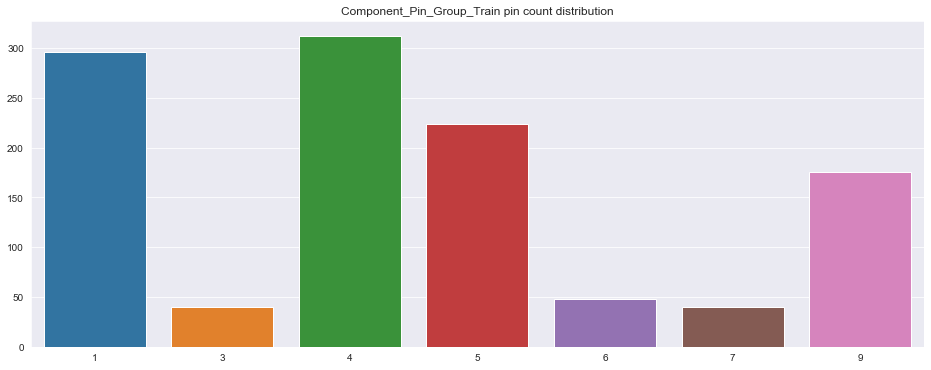

In [21]:
# Test
_temp = df_test.groupby('filename').filename.count() 
if len(_temp)>0:
    sns.set_style("whitegrid")
    barplot_pin_distribution(df_test, title="Component_Pin_Group_Test pin count distribution")
    
    # plt.figure(figsize=(16,6))
    # plt.title("Cumalitive of test")
    # kwargs = {'cumulative': True}
    # sns.distplot(Component_Pin_Group_Test, hist_kws=kwargs, kde_kws=kwargs)
    # print("Test Pin Data:\n", Component_Pin_Group_Test.value_counts())
else:
    print("[MSG]: Test set in empty.")

# Train
_temp = df_train.groupby('filename').filename.count() 
if len(_temp)>0:
    sns.set_style("darkgrid")
    barplot_pin_distribution(df_train, title="Component_Pin_Group_Train pin count distribution")
    
    # plt.figure(figsize=(16,6))
    # plt.title("Cumalitive of train")
    # kwargs = {'cumulative': True}
    # sns.distplot(Component_Pin_Group_Train, hist_kws=kwargs, kde_kws=kwargs)
    # print("Train Pin Data:\n", Component_Pin_Group_Train.value_counts())

else:
    print("[MSG]: Train set in empty.")

### Drop duplicate
- Sometime is a file the same line is repeate twice

In [34]:
# Test
if (len (df_test) != len(df_test.drop_duplicates())):
    print("Error: Duplicate entry found in dataset, furthur analysis is required.")

    #  Analysis
    _temp = df_test.drop_duplicates().groupby('filename').filename.count() 
    sns.set_style("darkgrid")
    plt.figure(figsize=(16,6))
    plt.title("Histogram of test")
    sns.barplot(x=_temp.value_counts().index, y=_temp.value_counts().values)

    #Save
    if (False):
        df_test.drop_duplicates().to_csv('test_dup_fixed.csv', index=False)
    else:
        print("{MSG]: Not saving changes.")
    print("BF: ",len(df_test),"AF:", len(df_test.drop_duplicates()))
    
    #Table
    print(df_test[df_test.duplicated()])
    print("Duplicates Count: ", len(df_test[df_test.duplicated()]))
else:
    print("[Info]: No duplicate entry found in test.")


# Train
if (len (df_train) != len(df_train.drop_duplicates())):
    print("Error: Duplicate entry found in dataset, furthur analysis is required.")
        
    sns.set_style("dark")
    _temp = df_train.drop_duplicates().groupby('filename').filename.count() 
    plt.figure(figsize=(16,6))
    plt.title("Histogram of train after dropping duplicates")
    sns.barplot(x=_temp.value_counts().index, y=_temp.value_counts().values)

    # Save
    if (False):
        df_train.drop_duplicates().to_csv('train_dup_fixed.csv', index=False)
    else:
        print("{MSG]: Not saving changes.")
    print("BF: ",len(df_train),"AF:", len(df_train.drop_duplicates()))
    
    
    #Table
    print(df_train[df_train.duplicated()])
    print("Duplicates Count: ", len(df_train[df_train.duplicated()]))
else:
    print("[Info]: No duplicate entry found in train.")



[Info]: No duplicate entry found in test.
[Info]: No duplicate entry found in train.


## Write space - 2
- Merging two csv

train Pin+Body Data:
 4     824
3     520
1     416
7     280
5     280
9     208
6     136
15     80
49     40
21     32
25     24
8       8
Name: filename, dtype: int64
test Pin+Body Data:
 4     80
3     40
1     32
7     16
15     8
6      8
5      8
Name: filename, dtype: int64
File path:	 D:\FZ_WS\JyNB\TF_Research_Api_LD_2_0\research\object_detection\scripts


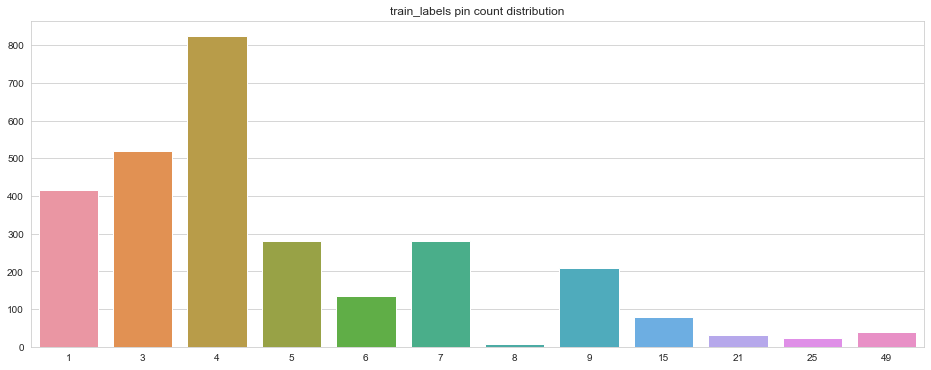

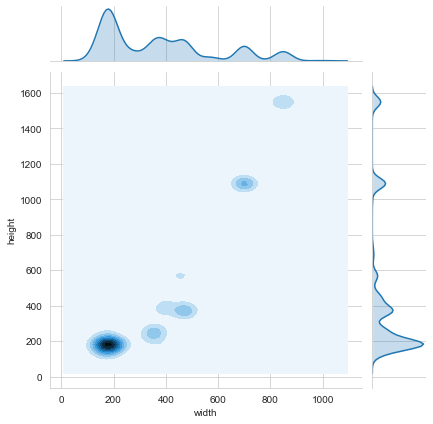

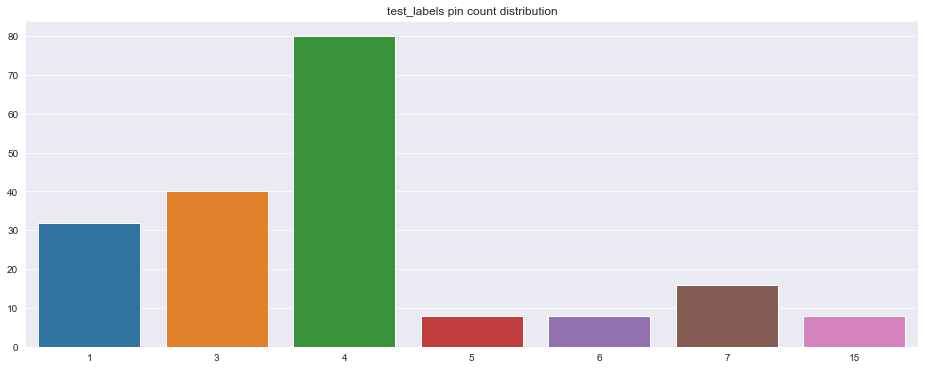

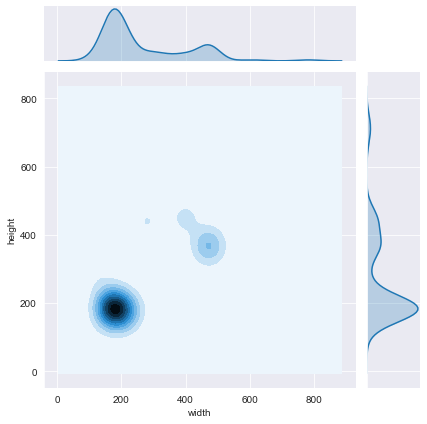

In [24]:
# Train
csv_list=[
    'D:/FZ_WS/JyNB/TF_Research_Api_LD_2_0/research/object_detection/images/H_Dataset_00/9608_t_1_90_r/train_labels.csv',
    'D:/FZ_WS/JyNB/TF_Research_Api_LD_2_0/research/object_detection/images/H_Dataset_00/AGIH-VR-G2571-61103-panelized/train_labels.csv'
]

prev = pd.read_csv(csv_list[0])
prev.head()
for fname in csv_list[1:]:
    _temp = pd.read_csv(fname)
    prev = pd.concat([prev, _temp])

prev['class'].apply(toUpperCase)

# Plot
sns.set_style("whitegrid")
barplot_pin_distribution(prev, title="train_labels pin count distribution")
sns.jointplot(x=prev['width'], y=prev['height'], kind="kde")
_temp = prev.groupby('filename').filename.count() 
print("train Pin+Body Data:\n", _temp.value_counts())
prev.to_csv('Merged_Csv/train_labels.csv',index=False)

# Test
csv_list=[
    'D:/FZ_WS/JyNB/TF_Research_Api_LD_2_0/research/object_detection/images/H_Dataset_00/9608_t_1_90_r/test_labels.csv',
    'D:/FZ_WS/JyNB/TF_Research_Api_LD_2_0/research/object_detection/images/H_Dataset_00/AGIH-VR-G2571-61103-panelized/test_labels.csv'
]

prev = pd.read_csv(csv_list[0])
prev.head()
for fname in csv_list[1:]:
    _temp = pd.read_csv(fname)
    prev = pd.concat([prev, _temp])

prev['class'].apply(toUpperCase)
sns.set_style("darkgrid")
barplot_pin_distribution(prev, title="test_labels pin count distribution")
sns.jointplot(x=prev['width'], y=prev['height'], kind="kde")
_temp = prev.groupby('filename').filename.count() 
print("test Pin+Body Data:\n", _temp.value_counts())
prev.to_csv('Merged_Csv/test_labels.csv',index=False)
print("File path:\t",os.getcwd())


train Pin+Body Data:
 4    312
1    296
5    224
9    176
6     48
7     40
3     40
Name: filename, dtype: int64
